# Avellaneda-Stoikov Model - Part4

```{note}
The solution!
```

## Symmetric exponential arrival rates

The main computational difficulty lies in solving

$$
\begin{aligned}
\theta_{t} &+ \frac{1}{2}\sigma^{2}\theta_{ss}-\frac{1}{2}\sigma^{2}\gamma\theta_{s}^{2} \\
&+ \underset{\delta^{b}}{\max}\left[\frac{\lambda^{b}(\delta^{b})}{\gamma}[1 - e^{\gamma(s-\delta^{b} - r^{b})}]\right] +\\
&+ \underset{\delta^{a}}{\max}\left[\frac{\lambda^{a}(\delta^{a})}{\gamma}[1 - e^{-\gamma(s+\delta^{b} - r^{b})}]\right] = 0\\
\theta(&s,q,T) = qs.
\end{aligned}
$$

The terms to be maximized in the expression are highly nonlinear and may depend on the inventory. In the case of symmetric, exponential
arrival rates:

$$\lambda^{a}(\delta) = \lambda^{b}(\delta) = Ae^{-k\delta}.$$

Along with the implicit relations:

$$s - r^{b}(s,q,t) = \delta^{b} - \frac{1}{\gamma}\ln\left(1 - \gamma\frac{\lambda^{b}(\delta^{b})}{(\partial\lambda^{b}/\partial\delta)(\delta^{b})}\right)$$

$$r^{a}(s,q,t) - s = \delta^{a} - \frac{1}{\gamma}\ln\left(1 - \gamma\frac{\lambda^{a}(\delta^{a})}{(\partial\lambda^{a}/\partial\delta)(\delta^{a})}\right)$$

We have:

$$
\begin{aligned}
\underset{\delta^{b}}{\max}\left[\frac{\lambda^{b}(\delta^{b})}{\gamma}[1 - e^{\gamma(s-\delta^{b} - r^{b})}]\right] &= \frac{\lambda^{b}(\delta^{b})}{\gamma}\left[1 - \frac{1}{1 - \gamma\frac{\lambda^{b}(\delta^{b})}{(\partial\lambda^{b}/\partial\delta)(\delta^{b})}}\right]\\
&=\frac{\lambda^{b}(\delta^{b})}{\gamma}\left[1 - \frac{1}{1 - \gamma\frac{Ae^{-k\delta^{b}}}{-kAe^{-k\delta^{b}}}}\right]\\
&=\frac{A}{k+\gamma}e^{-k\delta^{b}}
\end{aligned}
$$

Substituting the optimal values:

$$
\begin{aligned}
&\theta_{t} + \frac{1}{2}\sigma^{2}\theta_{ss}-\frac{1}{2}\sigma^{2}\gamma\theta_{s}^{2} + \frac{A}{k+\gamma}(e^{-k\delta^{a}} + e^{-k\delta^{b}}) = 0, \\
&\theta(s,q,T) = qs.
\end{aligned}
$$

## Asymptotic expansion in $q$

```{note}
The order arrival terms (the terms to be maximized in the expression) are highly nonlinear and may depend on the inventory. We therefore
suggest an asymptotic expansion of   in the inventory
variable $q$, and a linear approximation of the order
arrival terms.
```

Consider an asymptotic expansion in the inventory
variable

$$\theta(q,s,t) = \theta^{0}(s,t) + q\theta^{1}(s,t) + \frac{1}{2}q^{2}\theta^{2}(s,t) + \dots$$

The exact relations for the indifference bid and ask prices:

$$
\begin{aligned}
r^{b}(s,q,t) &= \theta(s,q+1,t) -\theta(s,q,t)\\
&=\theta^{1}(s,t) + (1+2q)\theta^{2}(s,t) + \dots
\end{aligned}
$$

and

$$
r^{a}(s,q,t) = \theta^{1}(s,t) + (-1+2q)\theta^{2}(s,t)+\dots
$$

Along with the implicit relations, we find that the optimal pricing
strategy amounts to quoting a spread of

$$
\begin{aligned}
\delta^{a}+\delta^{b} &= r^{a}(s,q,t) - r^{b}(s,q,t)+\frac{2}{\gamma}\ln(1+\frac{\gamma}{k}) \\
&\approx -2\theta^{2}(s, t) + \frac{2}{\gamma}\ln(1+\frac{\gamma}{k})
\end{aligned}
$$

around the reservation price given by

$$
\begin{aligned}
r(s,q,t) &= \frac{1}{2}(s-\delta^{b}) + \frac{1}{2}(s+\delta^{a})\\
&=\frac{r^{a}+ r^{b}}{2}\\
&\approx\theta^{1}(s,t) + 2q\theta^{2}(s,t).
\end{aligned}
$$

The bid-ask spread is independent of the inventory. Taking a first-order approximation of the order arrival
term

$$
\frac{A}{k+\gamma}(e^{-k\delta^{a}} + e^{-k\delta^{b}}) = \frac{A}{k+\gamma}(2 - k(\delta^{a} + \delta^{b})+\dots)
$$

we notice that the linear term does not depend on the
inventory $q$. If we substitute and group terms of order $q$, we obtain

$$
\begin{aligned}
&\theta_{t}^{1} + \frac{1}{2}\sigma^{2}\theta_{ss}^{1} = 0\\
&\theta_{1}(s, T) = s
\end{aligned}
$$

whose solution is $\theta^{1}(s, t)$. Grouping terms of order $q^{2}$ yields

$$
\begin{aligned}
&\theta_{t}^{2}+\frac{1}{2}\sigma^{2}\theta_{ss}^{2} -\frac{1}{2}\sigma^{2}\gamma(\theta_{s}^{1})^{2} = 0\\
&\theta^{2}(s, T) = 0.
\end{aligned}
$$

whose solution is $\theta^{2} = -(1/2)\sigma^{2}\gamma(T-t)$. Thus, for this
linear approximation of the order arrival term, we obtain
the same indifference price

$$r(s, t) = s - q\gamma\sigma^{2}(T-t)$$

We then set a bid/ask spread given by

$$\sigma^{a} + \sigma^{b} = \gamma\sigma^{2}(T-t) + \frac{2}{\gamma}\ln(1+\frac{\gamma}{k}).$$

## Numerical simulations

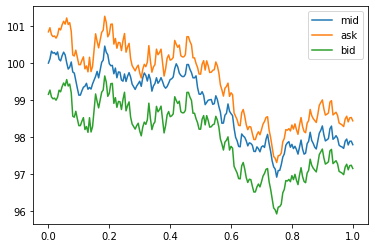

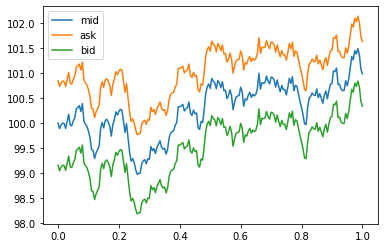

(1.4907704227514234, 73.07360727135028, 10)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def one_simulate(plot=False, symmetric=False):
    s = 100
    T = 1
    sigma = 2
    dt = 0.005
    q = 0
    gamma = 0.1
    k = 1.5
    A = 140
    x = 0
    s_list = []
    ask_list = []
    bid_list = []
    spread_list = []

    for t in np.arange(0, T + dt, dt):
        indifference_price = s - q*gamma*(sigma**2)*(T-t)
        spread = gamma*(sigma**2)*(T-t) + 2/gamma*np.log(1+gamma/k)
        spread_list.append(spread)
        
        if symmetric:
            ask_price = s + spread / 2
            bid_price = s - spread / 2
        else:
            ask_price = indifference_price + spread / 2
            bid_price = indifference_price - spread / 2
        delta_a = ask_price - s
        delta_b = s - bid_price
        s_list.append(s)
        ask_list.append(ask_price)
        bid_list.append(bid_price)

        prob_a = A * np.exp(-k*delta_a) * dt
        prob_b = A * np.exp(-k*delta_b) * dt
        if np.random.random() < prob_a:
            q -= 1
            x += ask_price
        if np.random.random() < prob_b:
            q += 1
            x -= bid_price

        if t < T:
            s += sigma * np.sqrt(dt) * np.random.randn()

    if plot:
        plt.plot(np.arange(0, T + dt, dt), s_list, label='mid')
        plt.plot(np.arange(0, T + dt, dt), ask_list, label='ask')
        plt.plot(np.arange(0, T + dt, dt), bid_list, label='bid')
        plt.legend()
        plt.show()
    return np.mean(spread_list), x + q*s, q

one_simulate(plot=True)
one_simulate(plot=True, symmetric=True)

In [2]:
spread_list = []
profit_list = []
q_list = []
for i in range(1000):
    spread, profit, q = one_simulate()
    spread_list.append(spread)
    profit_list.append(profit)
    q_list.append(q)

print('avg spread: ', np.mean(spread_list))
print('avg profit: ', np.mean(profit_list))
print('std profit: ', np.std(profit_list))
print('avg final q: ', np.mean(q_list))
print('std final q: ', np.std(q_list))

avg spread:  1.4907704227514236
avg profit:  65.05650170902578
std profit:  6.585956774549751
avg final q:  0.013
std final q:  3.116541512638649


In [3]:
spread_list = []
profit_list = []
q_list = []
for i in range(1000):
    spread, profit, q = one_simulate(symmetric=True)
    spread_list.append(spread)
    profit_list.append(profit)
    q_list.append(q)

print('avg spread: ', np.mean(spread_list))
print('avg profit: ', np.mean(profit_list))
print('std profit: ', np.std(profit_list))
print('avg final q: ', np.mean(q_list))
print('std final q: ', np.std(q_list))

avg spread:  1.4907704227514236
avg profit:  67.49843112939867
std profit:  13.351882018403339
avg final q:  -0.224
std final q:  8.405107018949847
